In [227]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn import manifold

In [228]:
trumpTweetsDf = pd.read_csv('TwitterTrumpSentimentScores.csv')

In [229]:
trumpTweetsDf.head()

,Date,Retweets,Likes,Tweet,WasDeleted,isRetweet,TweetYear,TweetMonth,Tweet_Tokens,tokenized_words,vader_score,sentiment,compound_score,Final Sentence
0,2021-01-06 00:47:01,48000,0,RT @DanScavino: 🔊WOW! We hear you from the Wes...,False,True,2021,1,rt wow we hear you from the west wing—thank you,"['wow', 'hear', 'west', 'wing—thank']","('Positive', 0.5859)",Positive,0.5859,wow hear west wing—thank
1,2021-01-06 00:46:29,31000,0,RT @christina_bobb: Pennsylvania is going to T...,False,True,2021,1,rt pennsylvania is going to trump the legislat...,"['pennsylvania', 'trump', 'legislator', 'spoken']","('Neutral', 0.0)",Neutral,0.0000,pennsylvania trump legislator spoken
2,2021-01-06 00:43:42,26000,127000,Get smart Republicans. FIGHT!,False,False,2021,1,get smart republicans fight,"['smart', 'republican', 'fight']","('Neutral', 0.0258)",Neutral,0.0258,smart republican fight
3,2021-01-06 00:17:52,11000,0,RT @TomiLahren: I wonder when the water main i...,False,True,2021,1,rt i wonder when the water main is gonna burst...,"['wonder', 'water', 'main', 'gon', 'na', 'burs...","('Neutral', 0.0)",Neutral,0.0000,wonder water main gon na burst georgia
4,2021-01-06 00:17:43,14000,0,RT @TomiLahren: Democrats scrounging up votes ...,False,True,2021,1,rt democrats scrounging up votes from mystical...,"['democrat', 'scrounging', 'vote', 'mystical',...","('Neutral', 0.0)",Neutral,0.0000,democrat scrounging vote mystical place


In [230]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
trumpTweetsDf['tokenized_tweets'] = trumpTweetsDf['Tweet_Tokens'].apply(lambda s : word_tokenize(re.sub(r'[^\w\s]',' ',str(s))))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
trumpTweetsDf['tokenized_tweets'] = trumpTweetsDf['tokenized_tweets'].apply(lambda words: [x for x in words if x not in stop])
trumpTweetsDf['tokenized_tweets_unique'] = trumpTweetsDf['tokenized_tweets'].apply(lambda s: sorted(set(s)))

In [232]:
trumpTweetsDf['tokenized_tweets_unique']

0                       [hear, rt, thank, west, wing, wow]
1        [going, legislators, pennsylvania, rt, spoken,...
2                         [fight, get, republicans, smart]
3        [burst, georgia, gon, main, na, rt, water, won...
4        [democrats, mystical, places, rt, scrounging, ...
                               ...                        
56510    [build, cling, donald, j, never, persona, rath...
56511    [along, apprentice, blog, celebrity, finale, l...
56512    [david, donald, financial, funny, late, letter...
56513    [appearing, apprentice, book, celebrity, champ...
56514    [david, donald, late, letterman, list, night, ...
Name: tokenized_tweets_unique, Length: 56515, dtype: object

In [233]:
#Frequency of words
freq_words = trumpTweetsDf['tokenized_tweets_unique'].sum()
freq_dist = nltk.FreqDist(freq_words)
freq_dist.most_common(10)

[('rt', 10118),
 ('great', 7042),
 ('trump', 6175),
 ('president', 4462),
 ('thank', 3552),
 ('people', 3297),
 ('us', 2587),
 ('new', 2391),
 ('country', 2299),
 ('get', 2262)]

In [234]:
freq_dist.most_common(100)

[('rt', 10118),
 ('great', 7042),
 ('trump', 6175),
 ('president', 4462),
 ('thank', 3552),
 ('people', 3297),
 ('us', 2587),
 ('new', 2391),
 ('country', 2299),
 ('get', 2262),
 ('america', 2213),
 ('thanks', 2151),
 ('would', 2149),
 ('big', 1986),
 ('like', 1968),
 ('one', 1905),
 ('donald', 1868),
 ('time', 1854),
 ('make', 1797),
 ('democrats', 1777),
 ('good', 1776),
 ('never', 1761),
 ('news', 1745),
 ('obama', 1717),
 ('today', 1691),
 ('many', 1682),
 ('vote', 1543),
 ('going', 1469),
 ('back', 1424),
 ('much', 1344),
 ('american', 1341),
 ('see', 1321),
 ('nan', 1319),
 ('want', 1314),
 ('job', 1256),
 ('even', 1253),
 ('years', 1252),
 ('best', 1221),
 ('fake', 1206),
 ('must', 1203),
 ('run', 1182),
 ('need', 1159),
 ('amp', 1130),
 ('media', 1129),
 ('love', 1123),
 ('go', 1111),
 ('election', 1108),
 ('last', 1097),
 ('way', 1095),
 ('think', 1088),
 ('win', 1085),
 ('really', 1075),
 ('day', 1056),
 ('know', 1048),
 ('house', 1044),
 ('done', 1023),
 ('states', 1018),
 (

In [235]:
#Lift Analysis of Presidential Run (2015-2016)

trumpTweetsDf_run1 = trumpTweetsDf[(trumpTweetsDf['TweetYear'] == 2015) | (trumpTweetsDf['TweetYear'] == 2016)]

In [236]:
trumpTweetsDf_run1.head(5)

,Date,Retweets,Likes,Tweet,WasDeleted,isRetweet,TweetYear,TweetMonth,Tweet_Tokens,tokenized_words,vader_score,sentiment,compound_score,Final Sentence,tokenized_tweets,tokenized_tweets_unique
26324,2016-12-31 13:59:04,8000,0,RT @realDonaldTrump: Happy Birthday @DonaldJTr...,False,True,2016,12,rt happy birthday,"['happy', 'birthday']","('Positive', 0.5719)",Positive,0.5719,happy birthday,"[rt, happy, birthday]","[birthday, happy, rt]"
26325,2016-12-31 13:58:12,8000,47000,Happy Birthday @DonaldJTrumpJr!,False,False,2016,12,happy birthday,"['happy', 'birthday']","('Positive', 0.5719)",Positive,0.5719,happy birthday,"[happy, birthday]","[birthday, happy]"
26326,2016-12-31 08:17:21,114000,300000,"Happy New Year to all, including to my many en...",False,False,2016,12,happy new year to all including to my many ene...,"['happy', 'new', 'enemy', 'fought', 'lost', 'b...","('Negative', -0.871)",Negative,-0.8710,happy new enemy fought lost badly dont love,"[happy, new, year, including, many, enemies, f...","[badly, dont, enemies, fought, happy, includin..."
26327,2016-12-30 17:18:18,18000,69000,Russians are playing @CNN and @NBCNews for suc...,False,False,2016,12,russians are playing and for such fools funny ...,"['russian', 'playing', 'fool', 'funny', 'watch...","('Neutral', 0.2023)",Neutral,0.2023,russian playing fool funny watch dont clue,"[russians, playing, fools, funny, watch, dont,...","[clue, dont, fools, funny, gets, playing, russ..."
26328,2016-12-30 14:46:55,6000,21000,"Join @AmerIcan32, founded by Hall of Fame lege...",False,False,2016,12,join 32 founded by hall of fame legend 32 on 1...,"['join', '32', 'founded', 'hall', 'fame', 'leg...","('Positive', 0.6249)",Positive,0.6249,join 32 founded hall fame legend 32 1192017 wa...,"[join, 32, founded, hall, fame, legend, 32, 11...","[1192017, 32, dc, fame, founded, hall, join, l..."


In [237]:
#Frequency of words
freq_words1 = trumpTweetsDf_run1['tokenized_tweets_unique'].sum()
freq_dist1 = nltk.FreqDist(freq_words1)

In [238]:
freq_dist1.most_common(100)

[('trump', 1983),
 ('great', 1546),
 ('thank', 1061),
 ('trump2016', 774),
 ('america', 754),
 ('donald', 737),
 ('president', 700),
 ('make', 620),
 ('hillary', 585),
 ('people', 583),
 ('makeamericagreatagain', 560),
 ('new', 515),
 ('get', 490),
 ('would', 440),
 ('like', 424),
 ('country', 416),
 ('vote', 409),
 ('us', 401),
 ('run', 394),
 ('time', 385),
 ('one', 376),
 ('via', 374),
 ('tonight', 344),
 ('clinton', 339),
 ('love', 332),
 ('need', 329),
 ('poll', 323),
 ('going', 322),
 ('big', 319),
 ('back', 311),
 ('thanks', 305),
 ('good', 299),
 ('dont', 291),
 ('never', 285),
 ('see', 284),
 ('show', 276),
 ('best', 265),
 ('cant', 263),
 ('many', 262),
 ('watch', 262),
 ('win', 259),
 ('today', 258),
 ('debate', 257),
 ('last', 247),
 ('mr', 244),
 ('go', 239),
 ('want', 238),
 ('really', 236),
 ('crooked', 233),
 ('said', 231),
 ('cruz', 228),
 ('much', 222),
 ('night', 221),
 ('rt', 217),
 ('amazing', 215),
 ('im', 214),
 ('obama', 213),
 ('job', 213),
 ('know', 207),
 ('b

In [239]:
#Word list for Lift Analysis

word_list=['hiliary','people','makeamericagreatagain','american','amendment','economy','corrupt','hoax','russia','pennsylvania','radical','democrats','biden','fake','china','media','impeachment','job','republican','schiff','border','coronavirus','covid','pelosi','obama']

In [240]:
dict(freq_dist1)

{'birthday': 19,
 'happy': 83,
 'rt': 217,
 'badly': 53,
 'dont': 291,
 'enemies': 8,
 'fought': 3,
 'including': 30,
 'know': 207,
 'lost': 77,
 'love': 332,
 'many': 262,
 'new': 515,
 'year': 87,
 'clue': 26,
 'fools': 10,
 'funny': 24,
 'gets': 61,
 'playing': 24,
 'russians': 2,
 'totally': 125,
 'watch': 262,
 '1192017': 1,
 '32': 10,
 'dc': 71,
 'fame': 10,
 'founded': 1,
 'hall': 23,
 'join': 201,
 'legend': 4,
 'washington': 64,
 'always': 116,
 'delay': 3,
 'great': 1546,
 'knew': 27,
 'move': 23,
 'putin': 20,
 'smart': 95,
 'v': 5,
 'administration': 16,
 'follow': 33,
 'rules': 12,
 'simple': 15,
 'two': 91,
 'delivered': 7,
 'economists': 2,
 'hope': 168,
 'say': 152,
 'trump': 1983,
 '20th': 6,
 'anymore': 18,
 'approaching': 1,
 'beginning': 25,
 'deal': 140,
 'end': 45,
 'fast': 53,
 'horrible': 40,
 'iran': 80,
 'israel': 28,
 'january': 8,
 'stay': 60,
 'strong': 95,
 'un': 2,
 'continue': 25,
 'disdain': 1,
 'disrespect': 3,
 'friend': 38,
 'let': 150,
 'total': 122

In [241]:
tweetWord1=pd.Series(freq_dist1)
trumpTweetsDf_run1_freq=pd.DataFrame(tweetWord1)
trumpTweetsDf_run1_freq.reset_index(drop=False,inplace=True)

In [242]:
trumpTweetsDf_run1_freq.columns=['Word','Freq']
matched_words=trumpTweetsDf_run1_freq[trumpTweetsDf_run1_freq['Word'].isin(word_list)].sort_values(by='Freq',ascending=False)

In [243]:
# counting the occurence 
words = matched_words['Word'].values
l=[]
matrix=pd.DataFrame(columns=range(len(words)),index=range(len(words)))
dis_matrix = pd.DataFrame(columns=range(len(words)),index=range(len(words)))

n=len(trumpTweetsDf_run1)
for i in range(len(words)):
  for j in range(i+1,len(words)):
    counti=0
    countj=0
    countij=0
    for k in trumpTweetsDf_run1['tokenized_tweets_unique']:
      if words[i] in k and words[j] in k:
        countij+=1
      if words[i] in k:
        counti+=1
      if words[j] in k:
        countj+=1
      else:
        pass
    l.append([words[i],words[j],counti,countj,countij])
    matrix.loc[i,j]=(countij*n)/(counti*countj)
    matrix.loc[j,i]=(countij*n)/(counti*countj)
    try:
        dis_matrix.loc[i,j]=(counti*countj)/(countij*n)
    except ZeroDivisionError:
        dis_matrix.loc[i,j] = 0.0
    try:
        dis_matrix.loc[j,i]=(counti*countj)/(countij*n)
    except ZeroDivisionError:
        dis_matrix.loc[j,i] = 0.0
    

In [244]:
#Lift Values
matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,0.539987,1.135748,0.946456,1.27997,5.009335,1.935314,1.300614,0.0,0.428926,2.14463,1.374513,0.650307,1.343968,0.0,1.343968,0.0,0.0,0.0
1,0.539987,NaN,0.098533,0.591197,0.333135,1.144773,0.1679,0.225672,4.050219,0.0,1.78617,0.0,0.0,1.399167,0.0,0.0,0.0,0.0,0.0
2,1.135748,0.098533,NaN,0.518107,1.167797,2.006487,0.882854,0.593316,0.0,2.348017,2.348017,1.254055,12.45964,0.0,5.808253,0.0,0.0,11.035681,0.0
3,0.946456,0.591197,0.518107,NaN,1.459746,0.334415,0.441427,1.186632,0.0,1.174009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.27997,0.333135,1.167797,1.459746,NaN,1.50752,1.492444,0.0,1.090968,0.0,0.0,2.826599,0.0,10.364198,3.272904,0.0,9.566952,0.0,0.0
5,5.009335,1.144773,2.006487,0.334415,1.50752,NaN,0.569842,2.297752,0.0,3.031077,7.577692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.935314,0.1679,0.882854,0.441427,1.492444,0.569842,NaN,1.011011,0.0,0.0,0.0,10.684545,0.0,3.134133,0.0,0.0,0.0,0.0,0.0
7,1.300614,0.225672,0.593316,1.186632,0.0,2.297752,1.011011,NaN,0.0,2.688858,2.688858,0.0,0.0,4.212545,0.0,0.0,0.0,0.0,0.0
8,0.0,4.050219,0.0,0.0,1.090968,0.0,0.0,0.0,NaN,0.0,0.0,4.686204,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.428926,0.0,2.348017,1.174009,0.0,3.031077,0.0,2.688858,0.0,NaN,0.0,5.683269,0.0,0.0,78.967525,0.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'Lift score heat map'}>

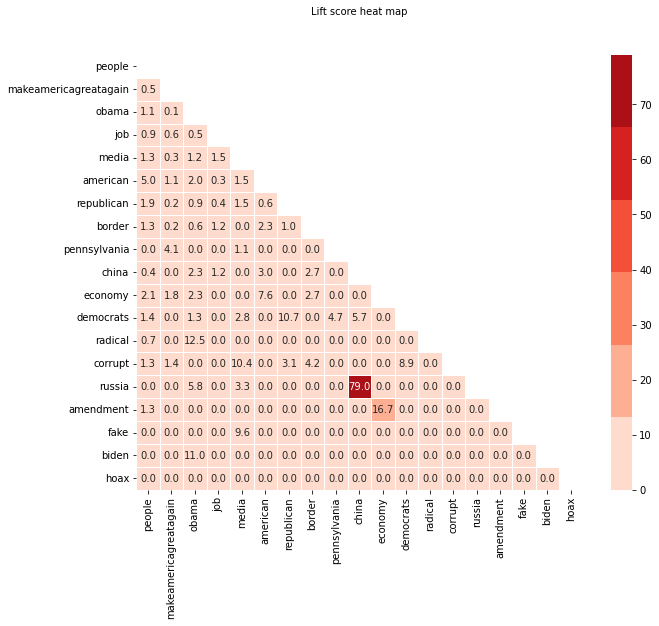

In [245]:
#Lift Analysis of Presidential Run (2015-2016)
matrix.index=words
matrix.columns=words
matrix.fillna(0, inplace=True)

mask = np.triu(np.ones_like(matrix))
colormap= sns.color_palette("Reds")

plt.figure(figsize=(10,8))
plt.title('Lift score heat map', fontsize = 10, pad = 40)
sns.heatmap(matrix, linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10},cmap=colormap,mask=mask)

In [246]:
dis_matrix.index=words
dis_matrix.columns=words
dis_matrix

,people,makeamericagreatagain,obama,job,media,american,republican,border,pennsylvania,china,economy,democrats,radical,corrupt,russia,amendment,fake,biden,hoax
people,NaN,1.851896,0.880477,1.056573,0.781269,0.199627,0.516712,0.768868,0.0,2.331405,0.466281,0.727531,1.537735,0.744065,0.0,0.744065,0.0,0.0,0.0
makeamericagreatagain,1.851896,NaN,10.148898,1.691483,3.001787,0.873536,5.955926,4.431209,0.2469,0.0,0.559857,0.0,0.0,0.714711,0.0,0.0,0.0,0.0,0.0
obama,0.880477,10.148898,NaN,1.930103,0.856313,0.498383,1.13269,1.685442,0.0,0.425891,0.425891,0.797413,0.080259,0.0,0.172169,0.0,0.0,0.090615,0.0
job,1.056573,1.691483,1.930103,NaN,0.685051,2.9903,2.265379,0.842721,0.0,0.851783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
media,0.781269,3.001787,0.856313,0.685051,NaN,0.663341,0.670042,0.0,0.916617,0.0,0.0,0.353782,0.0,0.096486,0.305539,0.0,0.104527,0.0,0.0
american,0.199627,0.873536,0.498383,2.9903,0.663341,NaN,1.754871,0.435208,0.0,0.329916,0.131966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
republican,0.516712,5.955926,1.13269,2.265379,0.670042,1.754871,NaN,0.989109,0.0,0.0,0.0,0.093593,0.0,0.319067,0.0,0.0,0.0,0.0,0.0
border,0.768868,4.431209,1.685442,0.842721,0.0,0.435208,0.989109,NaN,0.0,0.371905,0.371905,0.0,0.0,0.237386,0.0,0.0,0.0,0.0,0.0
pennsylvania,0.0,0.2469,0.0,0.0,0.916617,0.0,0.0,0.0,NaN,0.0,0.0,0.213392,0.0,0.0,0.0,0.0,0.0,0.0,0.0
china,2.331405,0.0,0.425891,0.851783,0.0,0.329916,0.0,0.371905,0.0,NaN,0.0,0.175955,0.0,0.0,0.012663,0.0,0.0,0.0,0.0


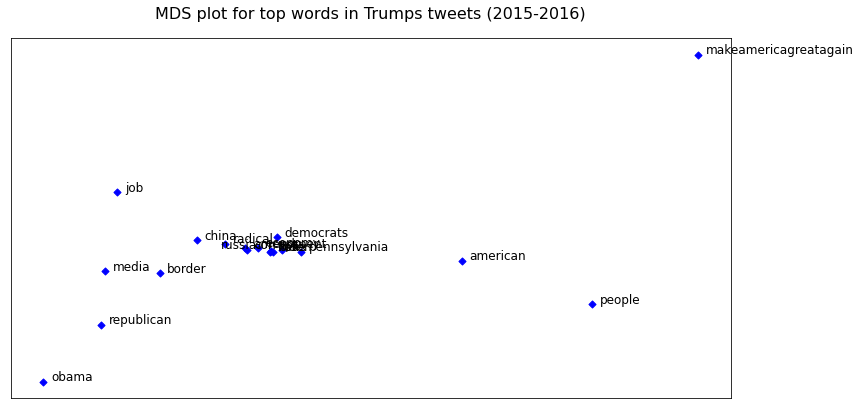

In [247]:
#MDS Plot
dis_matrix=dis_matrix.fillna(0)
mdsmatrix= dis_matrix.values

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=10)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

plt.figure(figsize=(10,5)) 


ax=plt.axes([0.,0.,1.,1.])
plt.title('MDS plot for top words in Trumps tweets (2015-2016)', fontsize = 16, pad = 20)
plt.scatter(x, y, marker='D', color='blue', s = 25)

n=list(dis_matrix.index)

for i in range(len(n)):
    if n[i] == 'russia':
        ax.annotate(n[i], xy= (x[i] - 0.08, y[i] + 0.01), fontsize = 12)
    else:
        ax.annotate(n[i], xy = (x[i] + 0.01, y[i] + 0.01), fontsize = 12)


plt.xticks([])
plt.yticks([])
plt.show()

In [248]:
#Lift Analysis of Presidential Run (2019-2020)
trumpTweetsDf_run2 = trumpTweetsDf[(trumpTweetsDf['TweetYear'] == 2019) | (trumpTweetsDf['TweetYear'] == 2020)]

In [249]:
trumpTweetsDf_run2.head(5)

,Date,Retweets,Likes,Tweet,WasDeleted,isRetweet,TweetYear,TweetMonth,Tweet_Tokens,tokenized_words,vader_score,sentiment,compound_score,Final Sentence,tokenized_tweets,tokenized_tweets_unique
134,2020-12-31 23:46:28,56000,189000,NaN,False,False,2020,12,NaN,[],"('Neutral', 0.0)",Neutral,0.0000,NaN,[nan],[nan]
135,2020-12-31 23:46:02,48000,149000,NaN,False,False,2020,12,NaN,[],"('Neutral', 0.0)",Neutral,0.0000,NaN,[nan],[nan]
136,2020-12-31 23:02:11,14000,0,"RT @TheFirstonTV: Joe Biden did a ""victory lap...",True,True,2020,12,rt joe biden did a victory lap but had a lot o...,"['joe', 'biden', 'victory', 'lap', 'lot', 'tro...","('Negative', -0.6344)",Negative,-0.6344,joe biden victory lap lot trouble speaking maj...,"[rt, joe, biden, victory, lap, lot, trouble, s...","[biden, joe, lap, lot, major, missing, one, rt..."
137,2020-12-31 22:52:33,38000,152000,Sen. Josh Hawley Slams Walmart Tweet Calling H...,False,False,2020,12,sen josh hawley slams walmart tweet calling hi...,"['sen', 'josh', 'hawley', 'slam', 'walmart', '...","('Negative', -0.8225)",Negative,-0.8225,sen josh hawley slam walmart calling ‘ sore lo...,"[sen, josh, hawley, slams, walmart, tweet, cal...","[america, calling, elections, fraudulent, hawl..."
138,2020-12-31 22:44:48,59000,377000,Finished off the year with the highest Stock M...,False,False,2020,12,finished off the year with the highest stock m...,"['finished', 'highest', 'stock', 'market', 'hi...","('Positive', 0.7506)",Positive,0.7506,finished highest stock market history setting ...,"[finished, year, highest, stock, market, histo...","[401k, congratulations, finished, highest, his..."


In [250]:
#Frequency of words
freq_words2 = trumpTweetsDf_run2['tokenized_tweets_unique'].sum()
freq_dist2 = nltk.FreqDist(freq_words2)

In [251]:
freq_dist2.most_common(200)

[('rt', 8962),
 ('great', 2264),
 ('president', 2235),
 ('trump', 1588),
 ('people', 1414),
 ('democrats', 1315),
 ('nan', 1228),
 ('thank', 1226),
 ('news', 1022),
 ('new', 948),
 ('us', 934),
 ('biden', 933),
 ('country', 896),
 ('big', 835),
 ('fake', 791),
 ('never', 774),
 ('get', 750),
 ('america', 741),
 ('american', 736),
 ('today', 734),
 ('would', 718),
 ('joe', 708),
 ('many', 678),
 ('one', 670),
 ('election', 658),
 ('media', 645),
 ('impeachment', 628),
 ('like', 626),
 ('years', 624),
 ('states', 616),
 ('amp', 616),
 ('vote', 614),
 ('time', 610),
 ('even', 604),
 ('house', 597),
 ('want', 591),
 ('state', 559),
 ('going', 532),
 ('done', 530),
 ('back', 523),
 ('good', 518),
 ('nothing', 515),
 ('job', 506),
 ('much', 505),
 ('make', 499),
 ('united', 489),
 ('china', 468),
 ('history', 453),
 ('win', 453),
 ('way', 453),
 ('see', 452),
 ('must', 451),
 ('republican', 449),
 ('border', 442),
 ('democrat', 440),
 ('said', 426),
 ('dems', 424),
 ('left', 422),
 ('first',

In [252]:
tweetWord2=pd.Series(freq_dist2)
trumpTweetsDf_run2_freq=pd.DataFrame(tweetWord2)
trumpTweetsDf_run2_freq.reset_index(drop=False,inplace=True)

In [253]:
trumpTweetsDf_run2_freq.columns=['Word','Freq']
matched_words=trumpTweetsDf_run2_freq[trumpTweetsDf_run2_freq['Word'].isin(word_list)].sort_values(by='Freq',ascending=False)

In [254]:
# counting the occurence 
words = matched_words['Word'].values
l=[]
matrix=pd.DataFrame(columns=range(len(words)),index=range(len(words)))
dis_matrix = pd.DataFrame(columns=range(len(words)),index=range(len(words)))

n=len(trumpTweetsDf_run2)
for i in range(len(words)):
  for j in range(i+1,len(words)):
    counti=0
    countj=0
    countij=0
    for k in trumpTweetsDf_run2['tokenized_tweets_unique']:
      if words[i] in k and words[j] in k:
        countij+=1
      if words[i] in k:
        counti+=1
      if words[j] in k:
        countj+=1
      else:
        pass
    l.append([words[i],words[j],counti,countj,countij])
    matrix.loc[i,j]=(countij*n)/(counti*countj)
    matrix.loc[j,i]=(countij*n)/(counti*countj)
    try:
        dis_matrix.loc[i,j]=(counti*countj)/(countij*n)
    except ZeroDivisionError:
        dis_matrix.loc[i,j] = 0.0
    try:
        dis_matrix.loc[j,i]=(counti*countj)/(countij*n)
    except ZeroDivisionError:
        dis_matrix.loc[j,i] = 0.0
    

<AxesSubplot:title={'center':'Lift score heat map'}>

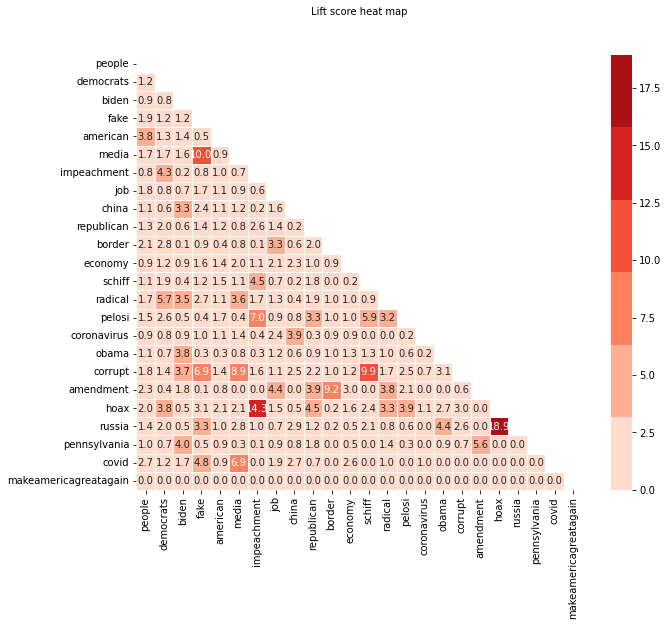

In [255]:
#Lift Analysis of Presidential Run (2019-2020)
matrix.index=words
matrix.columns=words
matrix.fillna(0, inplace=True)

mask = np.triu(np.ones_like(matrix))
colormap= sns.color_palette("Reds")

plt.figure(figsize=(10,8))
plt.title('Lift score heat map', fontsize = 10, pad = 40)
sns.heatmap(matrix, linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10},cmap=colormap,mask=mask)

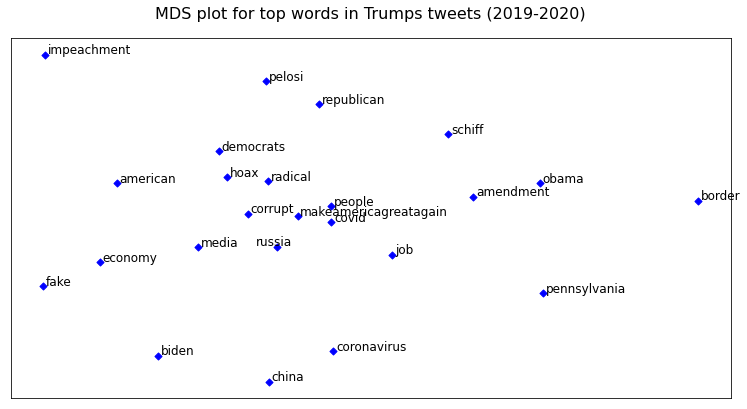

In [256]:
#MDS Plot
dis_matrix.index=words
dis_matrix.columns=words

dis_matrix=dis_matrix.fillna(0)
mdsmatrix= dis_matrix.values

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=10)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

plt.figure(figsize=(10,5)) 


ax=plt.axes([0.,0.,1.,1.])
plt.title('MDS plot for top words in Trumps tweets (2019-2020)', fontsize = 16, pad = 20)
plt.scatter(x, y, marker='D', color='blue', s = 25)

n=list(dis_matrix.index)

for i in range(len(n)):
    if n[i] == 'russia':
        ax.annotate(n[i], xy= (x[i] - 0.08, y[i] + 0.01), fontsize = 12)
    else:
        ax.annotate(n[i], xy = (x[i] + 0.01, y[i] + 0.01), fontsize = 12)


plt.xticks([])
plt.yticks([])
plt.show()